In [2]:
pip install rouge-score

Note: you may need to restart the kernel to use updated packages.


In [5]:
from rouge_score import rouge_scorer
import numpy as np
from nltk.util import skipgrams

# Sample target summaries
target_summaries = [
    ("The quick brown fox jumps over the lazy dog. Despite its agility, the fox often faces challenges in urban environments "
     "where it must navigate through traffic and avoid human interference. Conservation efforts are crucial to protect this "
     "endangered species."),
    ("NLTK is a powerful library for natural language processing. It provides a wide range of tools for text processing, "
     "including tokenization, parsing, and semantic reasoning. Researchers and developers use NLTK to build applications "
     "that understand and generate human language."),
    ("Machine learning and deep learning are transforming industries. These advanced techniques enable computers to learn "
     "from data and make predictions or decisions with minimal human intervention. Applications range from image recognition "
     "to natural language processing, driving innovation across various sectors.")
]

# Sample predicted summaries
predicted_summaries = [
    ("The quick brown fox leaps over the lazy dog. Although agile, the fox encounters difficulties in urban areas due to "
     "traffic and human activity. Efforts to conserve this endangered animal are vital."),
    ("NLTK is a strong library for NLP. It offers numerous tools for text processing, such as tokenization, parsing, and "
     "semantic analysis. Developers and researchers use NLTK to create applications that understand and generate human language."),
    ("Machine learning and deep learning are revolutionizing industries. These advanced methods allow computers to learn "
     "from data and make decisions with minimal human input. Applications span from image recognition to NLP, driving innovation "
     "across different fields.")
]

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Custom ROUGE-S function
def rouge_s(reference, candidate):
    def skip_bigrams(sentence):
        words = sentence.split()
        return set(skipgrams(words, 2, 1))
    
    cand_bigrams = skip_bigrams(candidate)
    print('Candidate Bigrams:', cand_bigrams)
    max_f1_score = 0
    
    for ref in reference:
        ref_bigrams = skip_bigrams(ref)
        print('Reference Bigrams:', ref_bigrams)
        common_bigrams = ref_bigrams.intersection(cand_bigrams)
        precision = len(common_bigrams) / len(cand_bigrams) if cand_bigrams else 0
        recall = len(common_bigrams) / len(ref_bigrams) if ref_bigrams else 0
        f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0
        if f1_score > max_f1_score:
            max_f1_score = f1_score
    
    return max_f1_score

# Function to compute ROUGE scores
def compute_rouge_scores(target_summaries, predicted_summaries):
    rouge_scores = {
        'rouge1': [],
        'rouge2': [],
        'rougeL': [],
        'rougeS': []
    }
    
    for i, (target, pred) in enumerate(zip(target_summaries, predicted_summaries)):
        scores = scorer.score(target, pred)
        rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
        rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
        rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)
        
        # Compute ROUGE-S using the custom function
        rouge_s_score = rouge_s([target], pred)
        rouge_scores['rougeS'].append(rouge_s_score)
        
        print(f"Summary Pair {i + 1}:")
        print(f"  ROUGE-1: {scores['rouge1'].fmeasure:.4f}")
        print(f"  ROUGE-2: {scores['rouge2'].fmeasure:.4f}")
        print(f"  ROUGE-L: {scores['rougeL'].fmeasure:.4f}")
        print(f"  ROUGE-S: {rouge_s_score:.4f}")
        print()
    
    # Calculate average scores
    avg_rouge_scores = {
        'rouge1': np.mean(rouge_scores['rouge1']),
        'rouge2': np.mean(rouge_scores['rouge2']),
        'rougeL': np.mean(rouge_scores['rougeL']),
        'rougeS': np.mean(rouge_scores['rougeS'])
    }
    
    return avg_rouge_scores

# Compute ROUGE scores
avg_rouge_scores = compute_rouge_scores(target_summaries, predicted_summaries)

# Print the average ROUGE scores
print("Average ROUGE Scores:")
for metric, score in avg_rouge_scores.items():
    print(f"{metric.upper()}: {score:.4f}")

Candidate Bigrams: {('conserve', 'endangered'), ('the', 'lazy'), ('The', 'brown'), ('areas', 'due'), ('areas', 'to'), ('over', 'the'), ('Although', 'the'), ('fox', 'encounters'), ('dog.', 'Although'), ('Although', 'agile,'), ('fox', 'over'), ('urban', 'due'), ('traffic', 'human'), ('fox', 'difficulties'), ('and', 'human'), ('in', 'areas'), ('to', 'this'), ('to', 'traffic'), ('lazy', 'dog.'), ('brown', 'leaps'), ('The', 'quick'), ('human', 'activity.'), ('fox', 'leaps'), ('this', 'endangered'), ('are', 'vital.'), ('encounters', 'difficulties'), ('encounters', 'in'), ('dog.', 'agile,'), ('due', 'to'), ('over', 'lazy'), ('difficulties', 'urban'), ('in', 'urban'), ('difficulties', 'in'), ('the', 'dog.'), ('endangered', 'are'), ('leaps', 'the'), ('the', 'fox'), ('animal', 'vital.'), ('due', 'traffic'), ('activity.', 'Efforts'), ('Efforts', 'to'), ('quick', 'fox'), ('this', 'animal'), ('the', 'encounters'), ('traffic', 'and'), ('urban', 'areas'), ('leaps', 'over'), ('agile,', 'the'), ('agile

In [7]:
from rouge_score import rouge_scorer
import numpy as np
from nltk.util import skipgrams
import matplotlib.pyplot as plt

# Sample target summaries
target_summaries = [
    ("The quick brown fox jumps over the lazy dog. Despite its agility, the fox often faces challenges in urban environments "
     "where it must navigate through traffic and avoid human interference. Conservation efforts are crucial to protect this "
     "endangered species."),
    ("NLTK is a powerful library for natural language processing. It provides a wide range of tools for text processing, "
     "including tokenization, parsing, and semantic reasoning. Researchers and developers use NLTK to build applications "
     "that understand and generate human language."),
    ("Machine learning and deep learning are transforming industries. These advanced techniques enable computers to learn "
     "from data and make predictions or decisions with minimal human intervention. Applications range from image recognition "
     "to natural language processing, driving innovation across various sectors.")
]

# Sample predicted summaries
predicted_summaries = [
    ("The quick brown fox leaps over the lazy dog. Although agile, the fox encounters difficulties in urban areas due to "
     "traffic and human activity. Efforts to conserve this endangered animal are vital."),
    ("NLTK is a strong library for NLP. It offers numerous tools for text processing, such as tokenization, parsing, and "
     "semantic analysis. Developers and researchers use NLTK to create applications that understand and generate human language."),
    ("Machine learning and deep learning are revolutionizing industries. These advanced methods allow computers to learn "
     "from data and make decisions with minimal human input. Applications span from image recognition to NLP, driving innovation "
     "across different fields.")
]

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Custom ROUGE-S function
def rouge_s(reference, candidate):
    def skip_bigrams(sentence):
        words = sentence.split()
        return set(skipgrams(words, 2, 1))
    
    cand_bigrams = skip_bigrams(candidate)
    print('Candidate Bigrams:', cand_bigrams)
    max_f1_score = 0
    
    for ref in reference:
        ref_bigrams = skip_bigrams(ref)
        print('Reference Bigrams:', ref_bigrams)
        common_bigrams = ref_bigrams.intersection(cand_bigrams)
        precision = len(common_bigrams) / len(cand_bigrams) if cand_bigrams else 0
        recall = len(common_bigrams) / len(ref_bigrams) if ref_bigrams else 0
        f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0
        if f1_score > max_f1_score:
            max_f1_score = f1_score
    
    return max_f1_score

# Function to compute ROUGE scores
def compute_rouge_scores(target_summaries, predicted_summaries):
    rouge_scores = {
        'rouge1': [],
        'rouge2': [],
        'rougeL': [],
        'rougeS': []
    }
    
    for i, (target, pred) in enumerate(zip(target_summaries, predicted_summaries)):
        scores = scorer.score(target, pred)
        rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
        rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
        rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)
        
        # Compute ROUGE-S using the custom function
        rouge_s_score = rouge_s([target], pred)
        rouge_scores['rougeS'].append(rouge_s_score)
        
        print(f"Summary Pair {i + 1}:")
        print(f"  ROUGE-1: {scores['rouge1'].fmeasure:.4f}")
        print(f"  ROUGE-2: {scores['rouge2'].fmeasure:.4f}")
        print(f"  ROUGE-L: {scores['rougeL'].fmeasure:.4f}")
        print(f"  ROUGE-S: {rouge_s_score:.4f}")
        print()
    
    # Calculate average scores
    avg_rouge_scores = {
        'rouge1': np.mean(rouge_scores['rouge1']),
        'rouge2': np.mean(rouge_scores['rouge2']),
        'rougeL': np.mean(rouge_scores['rougeL']),
        'rougeS': np.mean(rouge_scores['rougeS'])
    }
    
    return rouge_scores, avg_rouge_scores

# Compute ROUGE scores
rouge_scores, avg_rouge_scores = compute_rouge_scores(target_summaries, predicted_summaries)

# Print the average ROUGE scores
print("Average ROUGE Scores:")
for metric, score in avg_rouge_scores.items():
    print(f"{metric.upper()}: {score:.4f}")

# Plotting the ROUGE scores
def plot_rouge_scores(rouge_scores, avg_rouge_scores):
    metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeS']
    num_pairs = len(rouge_scores['rouge1'])
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set the width of the bars
    bar_width = 0.15
    
    # Set the positions of the bars on the x-axis
    index = np.arange(num_pairs)
    
    # Plot each metric
    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, rouge_scores[metric], bar_width, label=f'{metric.upper()}')
    
    # Add labels and title
    ax.set_xlabel('Summary Pair')
    ax.set_ylabel('F1 Score')
    ax.set_title('ROUGE Scores for Each Summary Pair')
    ax.set_xticks(index + bar_width * 1.5)
    ax.set_xticklabels([f'Pair {i + 1}' for i in range(num_pairs)])
    ax.legend()
    
    # Add average scores as text annotations
    for i, metric in enumerate(metrics):
        ax.text(index + i * bar_width, avg_rouge_scores[metric] + 0.01, f'Avg: {avg_rouge_scores[metric]:.4f}', 
                ha='center', va='bottom', fontsize=10, color='black')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot the ROUGE scores
plot_rouge_scores(rouge_scores, avg_rouge_scores)

Candidate Bigrams: {('conserve', 'endangered'), ('the', 'lazy'), ('The', 'brown'), ('areas', 'due'), ('areas', 'to'), ('over', 'the'), ('Although', 'the'), ('fox', 'encounters'), ('dog.', 'Although'), ('Although', 'agile,'), ('fox', 'over'), ('urban', 'due'), ('traffic', 'human'), ('fox', 'difficulties'), ('and', 'human'), ('in', 'areas'), ('to', 'this'), ('to', 'traffic'), ('lazy', 'dog.'), ('brown', 'leaps'), ('The', 'quick'), ('human', 'activity.'), ('fox', 'leaps'), ('this', 'endangered'), ('are', 'vital.'), ('encounters', 'difficulties'), ('encounters', 'in'), ('dog.', 'agile,'), ('due', 'to'), ('over', 'lazy'), ('difficulties', 'urban'), ('in', 'urban'), ('difficulties', 'in'), ('the', 'dog.'), ('endangered', 'are'), ('leaps', 'the'), ('the', 'fox'), ('animal', 'vital.'), ('due', 'traffic'), ('activity.', 'Efforts'), ('Efforts', 'to'), ('quick', 'fox'), ('this', 'animal'), ('the', 'encounters'), ('traffic', 'and'), ('urban', 'areas'), ('leaps', 'over'), ('agile,', 'the'), ('agile

TypeError: only length-1 arrays can be converted to Python scalars

Error in callback <function _draw_all_if_interactive at 0x000001A8B3FB4AF0> (for post_execute):


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1200x800 with 1 Axes>

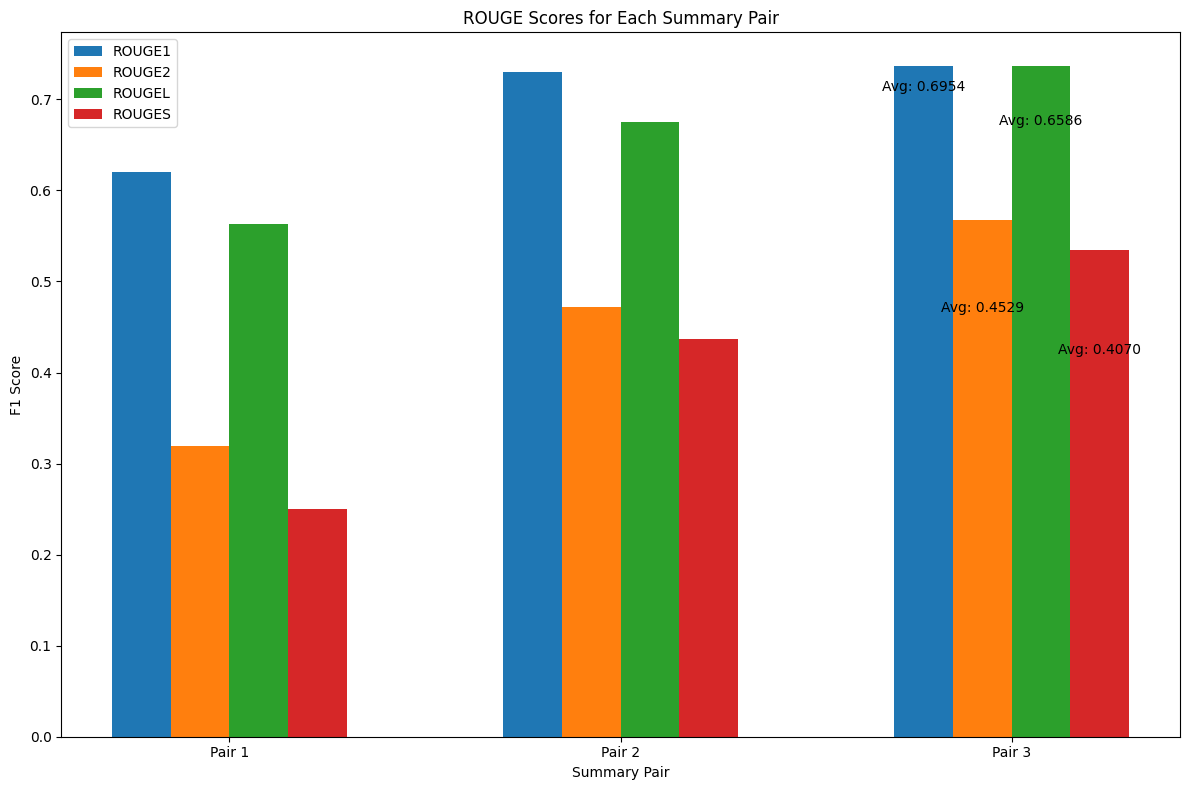

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# ROUGE scores extracted from the image
rouge_scores = {
    'rouge1': [0.6197, 0.7297, 0.7368],
    'rouge2': [0.3188, 0.4722, 0.5676],
    'rougeL': [0.5634, 0.6757, 0.7368],
    'rougeS': [0.2500, 0.4366, 0.5342]
}

# Average ROUGE scores
avg_rouge_scores = {
    'rouge1': 0.6954,
    'rouge2': 0.4529,
    'rougeL': 0.6586,
    'rougeS': 0.4070
}

# Plotting the ROUGE scores
metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeS']
num_pairs = len(rouge_scores['rouge1'])

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
index = np.arange(num_pairs)

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, rouge_scores[metric], bar_width, label=f'{metric.upper()}')

# Add labels and title
ax.set_xlabel('Summary Pair')
ax.set_ylabel('F1 Score')
ax.set_title('ROUGE Scores for Each Summary Pair')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels([f'Pair {i + 1}' for i in range(num_pairs)])
ax.legend()

# Add average scores as text annotations
for i, metric in enumerate(metrics):
    ax.text(index[-1] + i * bar_width, avg_rouge_scores[metric] + 0.01, f'Avg: {avg_rouge_scores[metric]:.4f}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

